In [58]:
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from PIL import Image
import pandas as pd
import numpy as np
# from google.colab.patches import cv2_imshow 

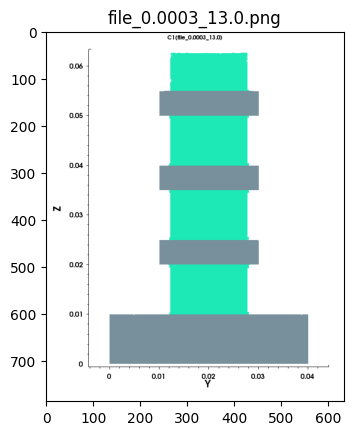

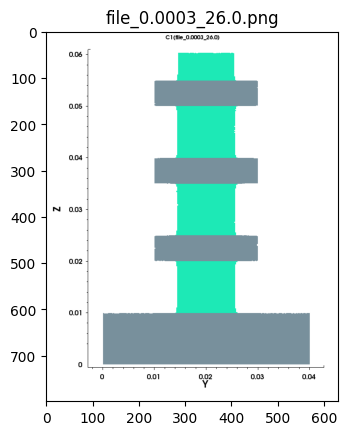

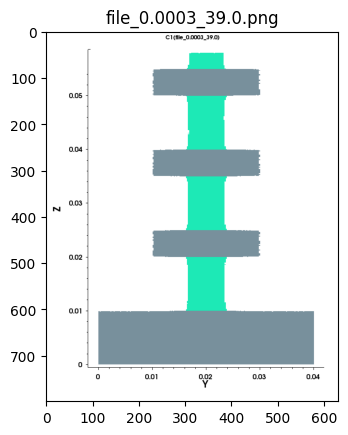

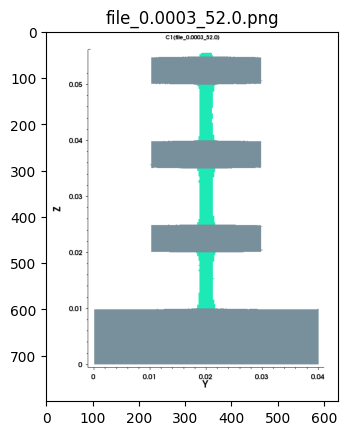

In [43]:
for folder in os.listdir('./images/images'):
    for image in os.listdir(f'./images/images/{folder}'):
        # image_o = cv2.imread(f'./images/images/{folder}/{image}', cv2.IMREAD_ANYCOLOR)
        image_o = mpimg.imread(f'./images/images/{folder}/{image}')

        # window_name = 'image'
  
        plt.title(f'{image}')
        plt.imshow(image_o, label=f'{image}')
        plt.show()

        cv2.waitKey(0) 
        cv2.destroyAllWindows() 
        # image = Image.open(f'./images/images/{folder}/{image}')
        # image.show()
    break


In [59]:
def get_total():
    total = 0
    for file in sorted(os.listdir(f'./images/images'), key=len):
        total+=len(os.listdir(f'./images/images/{file}')) 
    return total
total  = get_total()

test_size = int(0.2*total)

In [61]:
test_file_num = 0
turn = 1

image_data = []
image_info = pd.DataFrame(columns=['HCl_flux', 'time'])
test_image_data = []
test_image_info = pd.DataFrame(columns=['HCl_flux', 'time'])
for folder in os.listdir('./images/images'):
    for image in os.listdir(f'./images/images/{folder}'):
        if turn<=4 or test_file_num>test_size:
            image_o = cv2.imread(f'./images/images/{folder}/{image}')
            # image_o = cv2.cvtColor(image_o, cv2.COLOR_BGR2GRAY) 
            # image_o = mpimg.imread(f'./images/images/{folder}/{image}',1)
            resized_img = cv2.resize(image_o, (256,256))
            resized_cropped_img = resized_img[154:198,104:-80]
            image_data.append(resized_cropped_img)
            spilt_name = image.split('_')
            HCl_flux = float(spilt_name[1])
            time = int(spilt_name[2].split('.')[0])
            image_info = image_info._append({'HCl_flux': HCl_flux*1000, 'time': time}, ignore_index=True)
            turn+=1
        else:
            test_file_num+=1
            image_o = cv2.imread(f'./images/images/{folder}/{image}')
            # image_o = mpimg.imread(f'./images/images/{folder}/{image}',1)
            resized_img = cv2.resize(image_o, (256,256))
            # resized_img = resized_img/255.0
            resized_cropped_img = resized_img[154:198,104:-80]
            test_image_data.append(resized_cropped_img)
            spilt_name = image.split('_')
            HCl_flux = float(spilt_name[1])
            time = int(spilt_name[2].split('.')[0])
            test_image_info = test_image_info._append({'HCl_flux': HCl_flux*1000, 'time': time}, ignore_index=True)
            if turn<8: turn+=1
            else: turn = 1

HCl_flux    2.9
time        4.0
Name: 55, dtype: float64


(-0.5, 71.5, 43.5, -0.5)

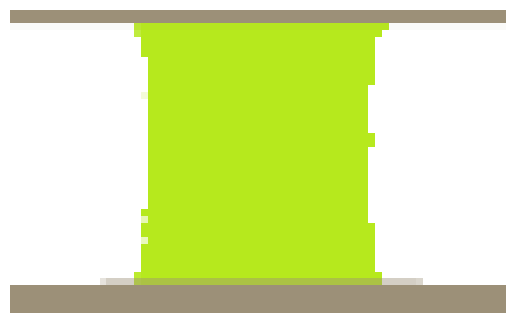

In [63]:
print(image_info.iloc[55,:])
plt.imshow(image_data[55])
plt.axis('off')

In [64]:
image_data = np.array(image_data)
# Normalize image data 
image_data = image_data/255.0

test_image_data = np.array(test_image_data)
# Normalize image data 
test_image_data = test_image_data/255.0

In [78]:
#LSTM with CNN 
# # Define input shape
# # (height, width, channels)
# input_shape = (2) 

# model = Sequential()
# model.add(Input(shape=input_shape))

# # TimeDistributed Wrapper to apply Conv layers to each frame
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())

# # Optional: Adding LSTM for temporal dependencies
# # model.add(LSTM(128, return_sequences=False))

# # Fully Connected Layers
# model.add(Dense(128, activation='relu'))
# model.add(Dense(2, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='mae')

# # Print the model summary
# # model.summary()


# history = model.fit( image_data, image_info, 
#                     validation_data=(test_image_data, test_image_info), 
#                     epochs=100, batch_size=4)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, TimeDistributed, LSTM, Input, Reshape
# from tensorflow.keras import backend as K


# # input_shape = (2,) 
# def custom_loss_function(y_true, y_pred):
#     error = abs(y_pred - y_true)
#     error = error / K.mean(y_true)
#     loss = K.mean(error, axis=-1)
#     return loss

# model = Sequential()
# model.add(Input(shape=(2,)))
# # model.add(Dense(128, activation='relu'))
# model.add(Dense(256, activation='relu'))  # Adjust units as needed
# model.add(Dense(512, activation='relu'))  # Adjust units as needed
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(32*50*3, activation='relu'))
# # model.add(Dense(256*256*3, activation='sigmoid'))  # Output layer for image (256x256)
# model.add(Dense(44*72*3, activation='sigmoid'))

# # Reshape the output to match the image dimensions
# model.add(Reshape((44, 72, 3)))
# # Compile the model
# model.compile(optimizer='adam', loss='mape')

# # Print the model summary
# # model.summary()

# history = model.fit(image_info, image_data, 
#                     validation_data=(test_image_info, test_image_data), 
#                     epochs=500, batch_size=8)

# y_pred = model.predict(test_image_info)

In [150]:
y_pred = model.predict(pd.DataFrame([[0.0029*1000,4]], columns=['HCl_flux', 'time']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [151]:
import math
# y_pred = y_pred.reshape(256,256,3)
y_pred = y_pred.reshape(44,72,3)
y_pred = y_pred*255.0
y_pred = y_pred.astype(int)

(-0.5, 71.5, 43.5, -0.5)

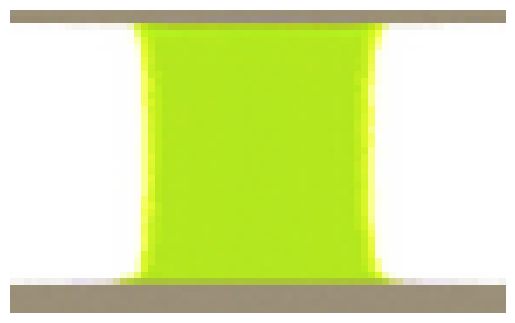

In [152]:
plt.imshow(y_pred)
plt.axis('off')

HCl_flux    2.9
time        4.0
Name: 55, dtype: float64


(-0.5, 71.5, 43.5, -0.5)

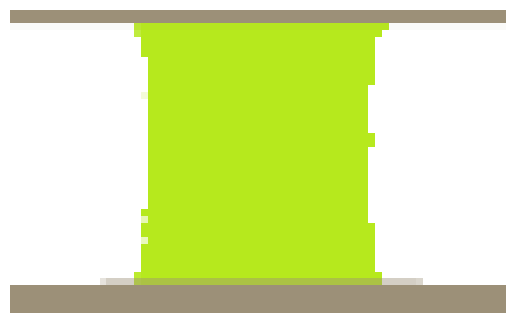

In [66]:
print(image_info.iloc[55,:])
plt.imshow(image_data[55])
plt.axis('off')

In [462]:
image_o = cv2.imread(f'./images/images/file_0.0003/file_0.0003_13.0.png', cv2.IMREAD_GRAYSCALE)
resized_img = cv2.resize(image_o, (256,256))
image_o = resized_img[163:191, 98:-74]

(-0.5, 83.5, 34.5, -0.5)

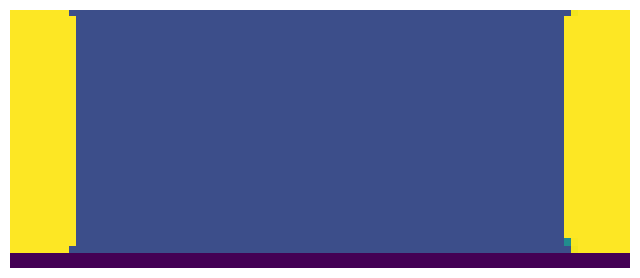

In [451]:
plt.figure(figsize=(8,4))
plt.imshow(image_o)
plt.axis('off')

In [463]:
image_o.shape

(28, 84)

In [195]:
test_file_num = 0
turn = 1

image_data = []
image_info = pd.DataFrame(columns=['HCl_flux', 'time'])
test_image_data = []
test_image_info = pd.DataFrame(columns=['HCl_flux', 'time'])
for folder in os.listdir('./images/images'):
    for image in os.listdir(f'./images/images/{folder}'):
        if turn<=4 or test_file_num>test_size:
            image_o = cv2.imread(f'./images/images/{folder}/{image}', cv2.IMREAD_GRAYSCALE)
            # image_o = cv2.cvtColor(image_o, cv2.COLOR_BGR2GRAY) 
            # image_o = mpimg.imread(f'./images/images/{folder}/{image}',1)
            resized_img = cv2.resize(image_o, (256,256))
            resized_cropped_img = resized_img[163:191, 98:-74]
            image_data.append(resized_cropped_img)
            spilt_name = image.split('_')
            HCl_flux = float(spilt_name[1])
            time = int(spilt_name[2].split('.')[0])
            image_info = image_info._append({'HCl_flux': HCl_flux*1000, 'time': time}, ignore_index=True)
            turn+=1
        else:
            test_file_num+=1
            image_o = cv2.imread(f'./images/images/{folder}/{image}', cv2.IMREAD_GRAYSCALE)
            # image_o = mpimg.imread(f'./images/images/{folder}/{image}',1)
            resized_img = cv2.resize(image_o, (256,256))
            # resized_img = resized_img/255.0
            resized_cropped_img = resized_img[163:191,98:-74]
            test_image_data.append(resized_cropped_img)
            spilt_name = image.split('_')
            HCl_flux = float(spilt_name[1])
            time = int(spilt_name[2].split('.')[0])
            test_image_info = test_image_info._append({'HCl_flux': HCl_flux*1000, 'time': time}, ignore_index=True)
            if turn<8: turn+=1
            else: turn = 1

In [196]:
image_data = np.array(image_data)
# Normalize image data 
image_data = image_data/255.0

test_image_data = np.array(test_image_data)
# Normalize image data 
test_image_data = test_image_data/255.0

(-0.5, 631.5, 798.5, -0.5)

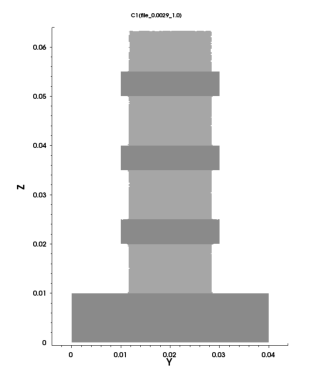

In [267]:
image_ss = cv2.imread('./images/images/file_0.0029/file_0.0029_1.0.png', cv2.IMREAD_GRAYSCALE)
	
# (thresh, blackAndWhiteImage) = cv2.threshold(image_ss, 0, 255, cv2.THRESH_BINARY)

plt.imshow(image_ss, cmap='gray')
plt.axis('off')

In [197]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, TimeDistributed, LSTM, Input, Reshape
from tensorflow.keras import backend as K


# input_shape = (2,) 
def custom_loss_function(y_true, y_pred):
    error = abs(y_pred - y_true)
    error = error / K.mean(y_true)
    loss = K.mean(error, axis=-1)
    return loss

model = Sequential()
model.add(Input(shape=(2,)))
# model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))  # Adjust units as needed
model.add(Dense(512, activation='relu'))  # Adjust units as needed
model.add(Dense(1024, activation='relu'))
model.add(Dense(2048, activation='relu'))
# model.add(Dense(256*256*3, activation='sigmoid'))  # Output layer for image (256x256)
model.add(Dense(28*84, activation='sigmoid'))

# Reshape the output to match the image dimensions
model.add(Reshape((28, 84)))
# Compile the model
model.compile(optimizer='adam', loss='mape')

# Print the model summary
# model.summary()

history = model.fit(image_info, image_data, 
                    validation_data=(test_image_info, test_image_data), 
                    epochs=500, batch_size=8)

y_pred = model.predict(test_image_info)

Epoch 1/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 19.5551 - val_loss: 10.6961
Epoch 2/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 10.2646 - val_loss: 10.3765
Epoch 3/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 9.9449 - val_loss: 10.3121
Epoch 4/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 8.1410 - val_loss: 10.1685
Epoch 5/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 7.5713 - val_loss: 9.3331
Epoch 6/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 7.3223 - val_loss: 7.9687
Epoch 7/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 7.0923 - val_loss: 9.8054
Epoch 8/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 7.1161 - val_loss: 7.4139
Epoch 9/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 5.4584 - val_loss: 7.5877
Epoch 10/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 4.6990 - val_loss: 5.7794
Epoch 11/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 3.6952 - val_loss: 6.4524
Epoch 12/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81m

In [268]:
y_pred = model.predict(pd.DataFrame([[0.0029*1000,3]], columns=['HCl_flux', 'time']))
y_pred = y_pred.reshape(28,84)
y_pred = np.ceil(y_pred*255.0)
y_pred = y_pred.astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


1. True Image
2. Predicted Image


(-0.5, 83.5, 27.5, -0.5)

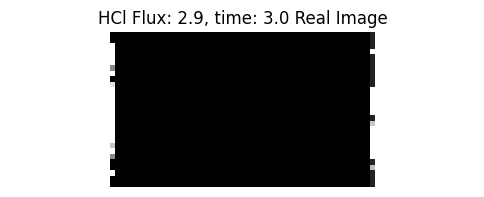

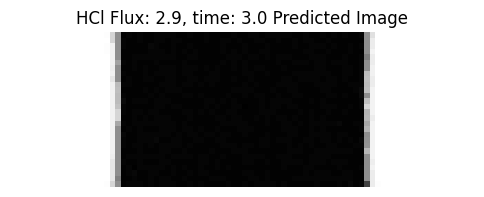

In [269]:
print("1. True Image\n2. Predicted Image")
plt.figure(figsize=(6,6))
plt.title(f'HCl Flux: {image_info.iloc[54,0]}, time: {image_info.iloc[54,1]} Real Image')
plt.imshow(image_data[54], cmap='gray')
plt.axis('off')
plt.figure(figsize=(6,6))
plt.title(f'HCl Flux: {image_info.iloc[54,0]}, time: {image_info.iloc[54,1]} Predicted Image')
plt.imshow(y_pred,  cmap='gray')
plt.axis('off')

In [235]:
import cv2
import numpy as np

# Load the true and predicted images
predicted_image = y_pred/255.0

# Ensure both images have the same dimensions
true_image = image_data[52]

# Compute pixel-wise difference
difference = np.abs(true_image.astype(np.float32) - predicted_image.astype(np.float32))

# Count the number of differing pixels
num_different_pixels = np.sum(difference > 0)

print(f'Number of differing pixels: {num_different_pixels}')


Number of differing pixels: 1019


In [232]:
true_image

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [230]:
predicted_image

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [509]:
test_file_num = 0
turn = 1

image_data = []
image_info = pd.DataFrame(columns=['HCl_flux', 'time'])
test_image_data = []
test_image_info = pd.DataFrame(columns=['HCl_flux', 'time'])
for folder in os.listdir('./images/images'):
    for image in os.listdir(f'./images/images/{folder}'):
        if turn<=4 or test_file_num>test_size:
            image_o = cv2.imread(f'./images/images/{folder}/{image}', cv2.IMREAD_GRAYSCALE)
            # image_o = cv2.cvtColor(image_o, cv2.COLOR_BGR2GRAY) 
            # image_o = mpimg.imread(f'./images/images/{folder}/{image}',1)
            resized_img = cv2.resize(image_o, (256,256))
            resized_cropped_img = resized_img[163:191, 140:-74]
            image_data.append(resized_cropped_img)
            spilt_name = image.split('_')
            HCl_flux = float(spilt_name[1])
            time = int(spilt_name[2].split('.')[0])
            image_info = image_info._append({'HCl_flux': HCl_flux*1000, 'time': time}, ignore_index=True)
            turn+=1
        else:
            test_file_num+=1
            image_o = cv2.imread(f'./images/images/{folder}/{image}', cv2.IMREAD_GRAYSCALE)
            # image_o = mpimg.imread(f'./images/images/{folder}/{image}',1)
            resized_img = cv2.resize(image_o, (256,256))
            # resized_img = resized_img/255.0
            resized_cropped_img = resized_img[163:191,140:-74]
            test_image_data.append(resized_cropped_img)
            spilt_name = image.split('_')
            HCl_flux = float(spilt_name[1])
            time = int(spilt_name[2].split('.')[0])
            test_image_info = test_image_info._append({'HCl_flux': HCl_flux*1000, 'time': time}, ignore_index=True)
            if turn<8: turn+=1
            else: turn = 1

In [512]:
test_image_data[0].shape

(28, 42)

In [511]:
image_data = np.array(image_data)
# Normalize image data 
image_data = image_data/255.0

test_image_data = np.array(test_image_data)
# Normalize image data 
test_image_data = test_image_data/255.0

In [514]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, TimeDistributed, LSTM, Input, Reshape
from tensorflow.keras import backend as K


# input_shape = (2,) 
def custom_loss_function(y_true, y_pred):
    error = abs(y_pred - y_true)
    error = error / K.mean(y_true)
    loss = K.mean(error, axis=-1)
    return loss

model = Sequential()
model.add(Input(shape=(2,)))
# model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))  # Adjust units as needed
model.add(Dense(512, activation='relu'))  # Adjust units as needed
model.add(Dense(1024, activation='relu'))
# model.add(Dense(2048, activation='relu'))
# model.add(Dense(256*256*3, activation='sigmoid'))  # Output layer for image (256x256)
model.add(Dense(28*42, activation='sigmoid'))

# Reshape the output to match the image dimensions
model.add(Reshape((28, 42)))
# Compile the model
model.compile(optimizer='adam', loss='mape')

# Print the model summary
# model.summary()

history = model.fit(image_info, image_data, 
                    validation_data=(test_image_info, test_image_data), 
                    epochs=1000, batch_size=8)

y_pred = model.predict(test_image_info)

Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 24.0258 - val_loss: 12.4273
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 10.8313 - val_loss: 10.3518
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.3212 - val_loss: 10.1872
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.2913 - val_loss: 11.8271
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.1541 - val_loss: 9.5895
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.5331 - val_loss: 9.3462
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.5632 - val_loss: 8.6751
Epoch 8/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.2669 - val_loss: 9.4540
Epoch 9/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.7008 - val_loss: 8.7774
Epoch 10/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.4294 - val_loss: 8.1826
Epoch 11/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.1594 - val_loss: 7.0493
Epoch 12/1000
32/32 ━━━━━━━━━━━━━━━

Width: 2, Height: 28


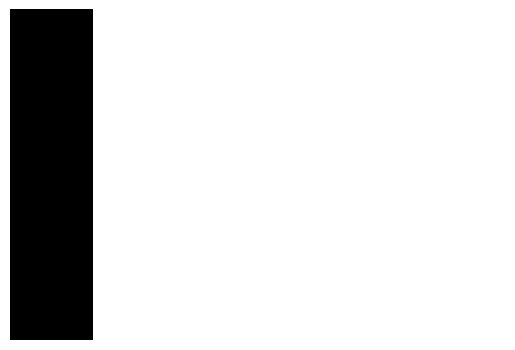

In [170]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the folder and image path


# Read the image in grayscale
image_o = cv2.imread('./images/images/file_0.0049/file_0.0049_3.0.png', cv2.IMREAD_GRAYSCALE)

# Resize the image to 256x256
resized_img = cv2.resize(image_o, (256, 256))

# Crop the image (adjust the indices as needed)
resized_cropped_img = resized_img[163:191, 140:-74]

# Apply edge detection (Canny)
edges = cv2.Canny(resized_cropped_img, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through the contours and find the bounding box
for contour in contours:
    # Calculate the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Draw the bounding box on the cropped image
    cv2.rectangle(resized_cropped_img, (x, y), (x + w, y + h), (255, 255, 255), 2)  # white color box

    # Print the width and height of the bounding box
    print(f'Width: {w}, Height: {h}')

# Display the cropped image with bounding boxes
plt.imshow(resized_cropped_img, cmap='gray')
# plt.imshow(resized_cropped_img)
plt.axis('off')
plt.show()


Width: 2.33, Height: 28.00


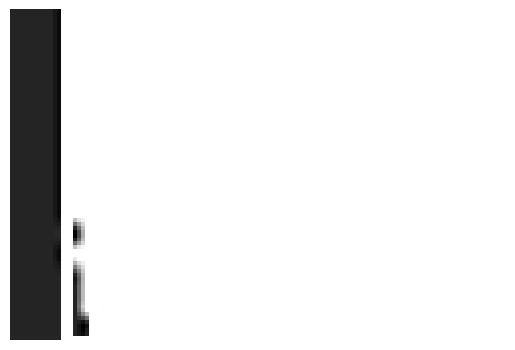

In [194]:
#interpolation and high-res..ing image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the folder and image path
image_path = './images/images/file_0.004/file_0.004_4.0.png'

# Read the image in grayscale
image_o = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to 256x256
resized_img = cv2.resize(image_o, (256, 256))

# Crop the image (adjust the indices as needed)
resized_cropped_img = resized_img[163:191, 140:-74]

# Increase the resolution for sub-pixel precision (e.g., 4x the original resolution)
factor = 3
high_res_img = cv2.resize(resized_cropped_img, (0, 0), fx=factor, fy=factor, interpolation=cv2.INTER_CUBIC)

# Apply edge detection (Canny)
edges = cv2.Canny(high_res_img, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through the contours and find the bounding box
for contour in contours:
    # Calculate the bounding box of the contour in high resolution
    x, y, w, h = cv2.boundingRect(contour)
    
    # Convert bounding box back to original scale
    x /= factor
    y /= factor
    w /= factor
    h /= factor
    
    # Draw the bounding box on the high-resolution image
    cv2.rectangle(high_res_img, (int(x * factor), int(y * factor)), 
                  (int((x + w) * factor), int((y + h) * factor)), (255, 255, 255), 2)

    # Print the width and height of the bounding box
    print(f'Width: {w:.2f}, Height: {h:.2f}')

# Display the high-resolution image with bounding boxes
plt.imshow(high_res_img, cmap='gray')
plt.axis('off')
plt.show()
